# Domain Coloring of Complex Functions

This Python script visualizes complex functions using a technique called domain coloring. The code uses NumPy for numerical computations and Matplotlib for plotting.

## The Complex Function

The function `complex_function(z)` takes a complex number `z` and applies the transformation `(z-1)/(z**2+z+1)`. This function is evaluated over a grid in the complex plane to produce a visualization of its behavior.

## How Domain Coloring Works

Domain coloring represents the complex function's output in a visual manner where:

- **Hue** corresponds to the argument (or angle) of the complex number. It is the phase component of the number in polar coordinates.
- **Value (Brightness)** is a representation of the function's magnitude. For enhanced visualization, this script uses `absContour` and `angleContour` to add contour lines based on the magnitude and argument of the complex number. This is followed by normalization to ensure the value remains within the range [0, 1]. A minimum value is also set to avoid complete darkness.
- **Saturation** is set to full (1) for maximum color intensity.

## Visualization

The script creates a meshgrid that spans the complex plane. For each point on the grid, it calculates the complex function's value. It then maps these values to colors in the HSV color space, which are subsequently converted to RGB for plotting.

The result is a color-coded visualization of the complex function where each color uniquely identifies a point in the function's output range. This is plotted using Matplotlib's `imshow` function, with the real and imaginary parts of `z` labeled on the x and y-axes respectively.

The title of the plot is 'Domain Coloring of f(z) = (z-1)/(z**2+z+1)', but it can be adjusted to match the actual function being visualized.

## Example Output

The script generates a plot as its output, which is a graphical representation of the complex function's domain coloring. Each color transition represents a change in the argument of the function's output, and the brightness variations indicate changes in the magnitude. The color wheel wraps around at 2π radians, creating a full spectrum of colors that correspond to the complex function's phase.

## Usage

To use the script, simply run it in a Python environment with the required libraries installed. The function can be modified to visualize different complex functions as needed.


In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [343]:
plt.rcParams['figure.figsize'] = [13, 10]
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation']='none'

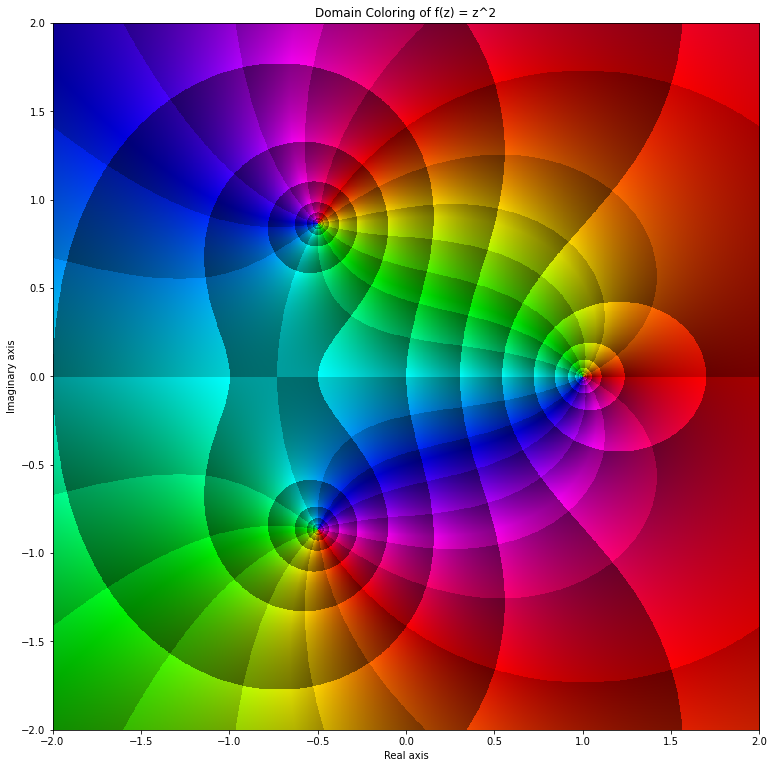

In [390]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# Function to evaluate
def complex_function(z):
    return (z-1)/(z**2+z+1)
    #return z

# Create a meshgrid for the complex plane
x = np.linspace(-2, 2, 1500)
y = np.linspace(-2, 2, 1500)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Calculate the function values on the grid
F = complex_function(Z)

# Domain coloring based on the argument (hue) and modulus (value)
hue = np.angle(F) / (2 * np.pi) %1
value = absContour(np.abs(F)) + angleContour( np.angle(F) )

# Normalizing the value to [0, 1]
value = (value - value.min()) / (value.max() - value.min())
minValue = 0.4
value = value*(1-minValue) + minValue

# Saturation is set to 1 for full color intensity
saturation = np.ones_like(value)

# Combine HSV components into a single three-dimensional array
HSV = np.stack((hue, saturation, value), axis=-1)

# Convert HSV to RGB for display
RGB = hsv_to_rgb(HSV)

# Plot the domain coloring
plt.figure(figsize=(13, 13))
plt.imshow(RGB, extent=(-2, 2, -2, 2), origin='lower')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.title('Domain Coloring of f(z) = z^2')
plt.show()
